# Day 4

Fuente: https://www.kaggle.com/datasets/shub218/energy-data-1990-2020

In [121]:
import pandas as pd

In [122]:
data = pd.read_csv('Energy_data_1990_2020.csv')

In [123]:
!pip install pywaffle

Defaulting to user installation because normal site-packages is not writeable


In [124]:
data_filtered = data[data['Year'].isin([1990, 2020])]

co2_emissions_by_region = data_filtered.groupby(['Year', 'Region'])['CO2 emissions from fuel combustion (MtCO2)'].sum().reset_index()

data_for_waffle = {
    year: dict(zip(group['Region'], group['CO2 emissions from fuel combustion (MtCO2)']))
    for year, group in co2_emissions_by_region.groupby('Year')
}

In [125]:
import matplotlib.pyplot as plt
from pywaffle import Waffle  

In [126]:
color_palette = {
    'Europe': '#1f77b4',  # Azul
    'North America': '#ff7f0e',  # Naranja
    'Asia & Pacific': '#2ca02c',  # Verde
    'South/Latin America': '#d62728',  # Rojo
    'Middle east': '#9467bd',  # Púrpura
    'Africa': '#8c564b',  # Marrón
    'Arab States': '#e377c2',  # Rosa
}

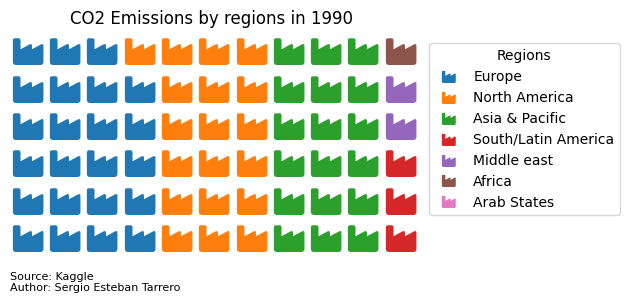

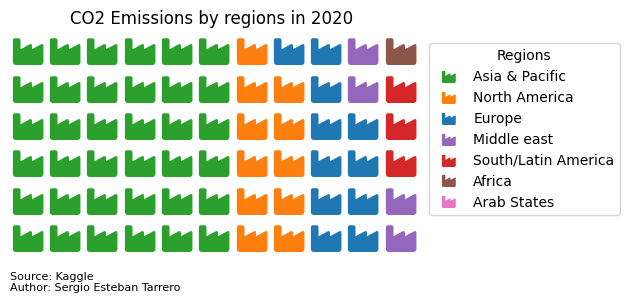

In [127]:
def generate_waffle_chart_for_top_regions(data, year, color_palette, filename):
    top_regions = data[year]
    top_regions = dict(sorted(top_regions.items(), key=lambda item: item[1], reverse=True)[:10])
    
    total_emissions = sum(top_regions.values())
    proportions = {region: emissions / total_emissions * 100 for region, emissions in top_regions.items()}
    
    region_colors = [color_palette[region] for region in proportions.keys()]
    
    fig = plt.figure(
        FigureClass=Waffle,
        rows=6, columns=11,
        values=proportions,
        colors=region_colors, 
        title={'label': f'CO2 Emissions by regions in {year}', 'loc': 'center'},
        legend={'loc': 'upper left', 'bbox_to_anchor': (1.02, 0.98), 'title': 'Regions'},
        icons='industry', icon_size=22,
        icon_legend=True
    )
    
    plt.text(0, -0.2, 'Source: Kaggle\nAuthor: Sergio Esteban Tarrero', fontsize=8, ha='left', va='bottom')
    plt.savefig(f'SergioEstebanTarreroDay4_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
generate_waffle_chart_for_top_regions(data_for_waffle, 1990, color_palette, 'waffle_chart_1990.png')
generate_waffle_chart_for_top_regions(data_for_waffle, 2020, color_palette, 'waffle_chart_2020.png')

In [128]:
from PIL import Image

def combine_images_vertically(image_filenames, output_filename):
    images = [Image.open(filename) for filename in image_filenames]
    
    max_width = max(image.width for image in images)
    total_height = sum(image.height for image in images)
    
    combined_image = Image.new('RGB', (max_width, total_height))
    
    current_y = 0
    for image in images:
        combined_image.paste(image, (0, current_y))
        current_y += image.height 
    
    combined_image.save(output_filename)

image_filenames = ['SergioEstebanTarreroDay4_1990.png', 'SergioEstebanTarreroDay4_2020.png']

output_filename = 'SergioEstebanTarreroDay4.png'

combine_images_vertically(image_filenames, output_filename)